2019-06-09 17:27:01.806627
Start/Continue training from epoch 135
({'loss': 1.1981712914584728, 'mAP': 0.7676041629759542}, {'loss': 3.9922084278530545, 'mAP': 0.542723058674944})
Finish training for 135 epochs


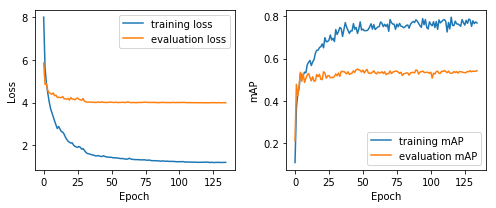

In [1]:
%matplotlib inline
import dataset
import model
import stats
import util
import loss
import datetime
import torch
import nntools as nt
import matplotlib.pyplot as plt
import torch.utils.data as td 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
dataset_root_dir = '/datasets/ee285f-public/PascalVOC2012'

train_set = dataset.VOCDataset(dataset_root_dir, S=7)
val_set = dataset.VOCDataset(dataset_root_dir, mode='val', S=7)

lr = 1e-4
net = model.ResYOLO(num_classes=20)
net = net.to(device)
adam = torch.optim.SGD(net.parameters(), lr=lr, momentum=0.9, weight_decay=0.0005)
#scheduler = torch.optim.lr_scheduler.LambdaLR(adam, lr_lambda, last_epoch=-1)
stats_manager = stats.ClassificationStatsManager()
exp = nt.Experiment(net, train_set, val_set, adam, stats_manager, batch_size=64,
               output_dir="Inference", perform_validation_during_training=True)

fig, axes = plt.subplots(ncols=2, figsize=(7, 3))
print(datetime.datetime.now())
exp.run(num_epochs=135, plot=lambda exp: util.plot(exp, fig=fig, axes=axes))

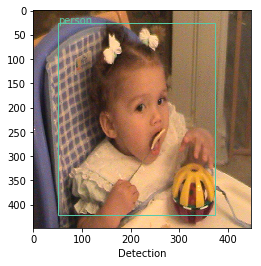

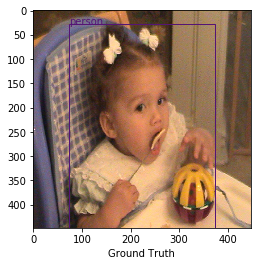

In [2]:
train_loader = td.DataLoader(train_set, batch_size=32, \
                             shuffle=True, pin_memory=True)
val_loader = td.DataLoader(val_set, batch_size=32, \
                             shuffle=True, pin_memory=True)
it = iter(val_loader)
img, tgt = next(it)
img = img.to(device)
tgt = tgt.to(device)
y = net.forward(img)
shape = tgt.shape
y0 = y[0]
tgt0 = tgt[0]
boxes,labels,_ = util.decoder(y0)
boxes_tgt,labels_tgt,_ = util.decoder(tgt0)
img = img.to('cpu')

util.show_img_with_boxes(img[0], boxes, labels, 'Detection')
util.show_img_with_boxes(img[0], boxes_tgt, labels_tgt,mode='Ground Truth')


In [3]:
exp.evaluate(eval_mode='test')

{'loss': 1.3952967749701606,
 'mAP': 0.5436685551098596,
 'AP': {'tvmonitor': 0.3347530864197531,
  'boat': 0.25827160493827167,
  'aeroplane': 0.705240299823633,
  'person': 0.35460760412196496,
  'car': 0.5119212962962962,
  'bus': 0.537460250654695,
  'cat': 0.6341643472912825,
  'dog': 0.5786222188305521,
  'horse': 0.5602623456790123,
  'motorbike': 0.5369047619047619,
  'sheep': 0.24462121212121207,
  'train': 0.5356790123456789,
  'chair': 0.19296369782480893,
  'bird': 0.4849633699633699,
  'diningtable': 0.32604497354497347,
  'cow': 0.3431900352733686,
  'bicycle': 0.567799823633157,
  'bottle': 0.2965784832451499,
  'pottedplant': 0.1871604938271605,
  'sofa': 0.25103174603174605}}